<h1 style="text-align: center;"><strong>Analyse de la base de donn&eacute;es du Y Combinator</strong></h1>

<h2 style="text-align: left;"><span style="color: #800000;"><strong>Contexte</strong></span></h2>

<blockquote>
<h2 style="text-align: center;"><em>"Y Combinator created a new model for funding early stage&nbsp;startups."</em></h2>
<p>&nbsp;</p>
</blockquote>

Fondé par Paul Graham en Mars 2005 à Cambridge, Massachusetts, le Y Combinator a depuis pris son envol pour devenir un des acteurs incontournables de la Silicon Valley. C'est un programme semestriel investissant $150K et offrant un accompagnement à une sélection de startups early-stage (n'ayant pas encore trouvé leur market/fit).

Les jeunes pousses emménagent dans la Silicon Valley pendant 3 mois, suivent un programme intensif et sont accompagnés par des professionnels renommés de l'entrepreneuriat. A la suite de ces trois mois, un "Demo Day" est organisé permettant aux entreprises de pitcher leur produit/service devant une piscine d'investisseurs.

Depuis 2005, plus de 2000 startups ont été fondé et ont combiné une valorisation totale de plus de $100 milliards.
Parmis ces entreprises, on retrouvera des noms comme Airbnb, Dropbox, Stripe et Mixpanel...

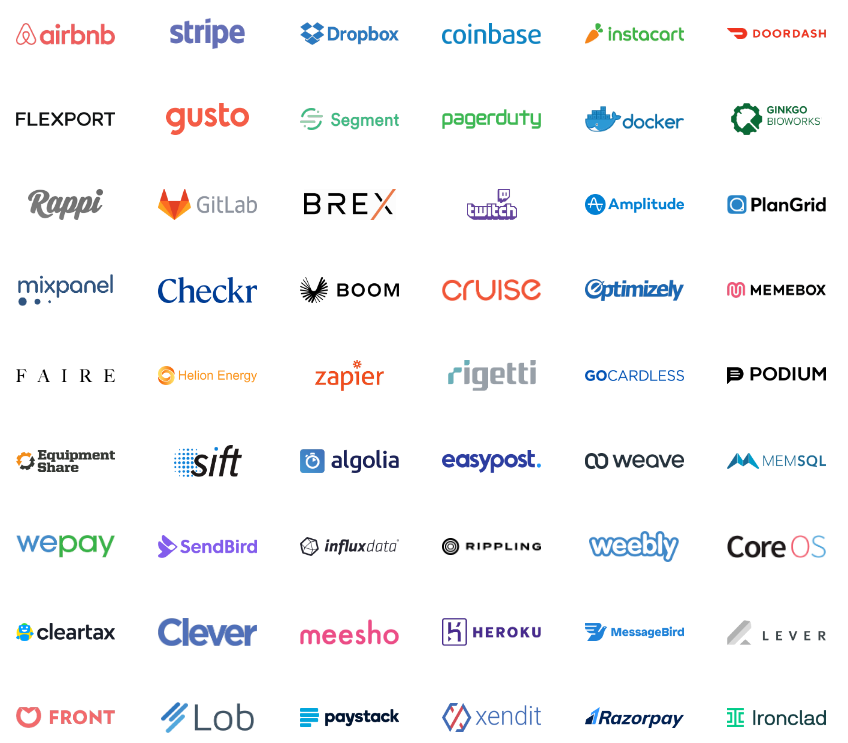

In [6]:
from IPython.display import Image
Image(filename='D:\_IMSD\Python\y-combinator_companies.png', width=600, height=600)

<p>&nbsp;</p>
<p>Le Y Combinator a une base de donn&eacute;es en ligne recensant&nbsp;diverses informations sur les startups qu'il a suivit au cours du temps (<a href="https://www.ycdb.co">https://www.ycdb.co</a>).</p>
<p>Sur la page d'acceuil, il y a 11 classements regroupant des "Top 100" pour diff&eacute;rents domaines:&nbsp;</p>
<ol>
<li><strong><span style="color: #800000;">"The most funded</span></strong>" (bas&eacute; sur&nbsp;le montant total lev&eacute; par une entreprise)</li>
<li><span style="color: #800000;"><strong>"The most visited"</strong></span> (bas&eacute; sur le traffic des 3 derniers mois via des calculs de moyenne de visiteurs uniques journalier et estimation du nombre de pages vues. Source: Alexa)</li>
<li><span style="color: #800000;"><strong>"The most popular"</strong></span> (bas&eacute; sur le nombre de followers Twitter. Source: Twitter)</li>
<li><span style="color: #800000;"><strong>"The most authoritative"</strong></span> (bas&eacute; sur un score entre 1 et 100 pr&eacute;dictant&nbsp;la probabilit&eacute;&nbsp;qu'un site soit performant dans les r&eacute;sultats de recherches organiques de Google. Source: Moz)</li>
<li><span style="color: #800000;"><strong>"The most liked"</strong></span> (bas&eacute; sur&nbsp;le nombre de "J'aime" sur la page de l'entreprise. Source: Facebook)</li>
<li><span style="color: #800000;"><strong>"The most upvoted"</strong></span> (bas&eacute; sur le nombre de posts associ&eacute;s &agrave; l'entreprise sur Product Hunt. Source: Product Hunt)</li>
<li><span style="color: #800000;"><strong>"The fastest growing"</strong></span> (bas&eacute; sur une moyenne pond&eacute;r&eacute;e sur 4 semaines permettant de mesurer le gain de traction d'une entreprise. Ce calcul prend en compte les metrics de la startup (nombre d'employ&eacute;s, annonce de lev&eacute;e de fonds) et son "Mindshare score" (estimation de son traffic web, nombre de t&eacute;l&eacute;chargement de l'application mobile, nombre de followers sur les r&eacute;seaux sociaux). Source: Mattermark)</li>
<li><span style="color: #800000;"><strong>"The most prolific"</strong></span> (bas&eacute; sur le nombre de tweets post&eacute; sur le compte de l'entreprise. Source: Twitter)</li>
<li><span style="color: #800000;"><strong>"The most influential"</strong></span> (bas&eacute; sur le nombre de followers sur Linkedin. Source: Linkedin)</li>
<li><span style="color: #800000;"><strong>"The most populous"</strong></span> (bas&eacute; sur le nombre d'employ&eacute; dans l'entreprise. Source: Clearbit)</li>
<li><span style="color: #800000;"><strong>"The most Cashed Out"</strong></span> (sur les entreprises qui ont &eacute;t&eacute; rachet&eacute;, la valeure de la transaction en US dollars. Source: Seed-DB)</li>
</ol>
<p>&nbsp;</p>
<p>&nbsp;</p>

<h2 style="text-align: left;"><span style="color: #800000;"><strong>Objectif initial du projet</strong></span></h2>

<p>Notre objectif initial fut d'analyser les corr&eacute;lations&nbsp;ces 11 classements dans le but de&nbsp;savoir s'il existait des facteurs r&eacute;currents dans les r&eacute;ussites&nbsp;des startups.</p>
<p>Pour cela, nous avons automatis&eacute; un scrap permettant de r&eacute;cup&eacute;rer les 11 classements dans une seule fonction.</p>

<h2 style="text-align: left;"><span style="color: #800000;"><strong>Développement du scrap</strong></span></h2>

<p>Pour r&eacute;aliser ce scraping, nous avons utilis&eacute; les technologies suivantes:</p>
<ul>
<li>Numpy</li>
<li>Pandas</li>
<li>BeautifulSoup</li>
<li>Requests</li>
<li>Tqdm</li>
<li>Urllib</li>
</ul>
<p>&nbsp;</p>

# Etape I: Import des packages nécessaires

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
from tqdm import tqdm
import urllib

# Etape II: Créer une fonction permettant d'automatiser le scrap par la suite

In [2]:
def y_combinator_scraper():
    
    # Listing des URLs à scraper
    based_url = 'https://www.ycdb.co/top-companies/'
    
    url_funding = 'funding'
    url_visited = 'alexa-rank'
    url_popular = 'twitter-followers'
    url_authoritative = 'domain-authority'
    url_liked = 'facebook-likes'
    url_upvoted = 'product-hunt-votes'
    url_growing = 'growth-score'
    url_prolific = 'tweet-count'
    url_influential = 'linkedin-followers'
    url_populous = 'employees'
    url_exit_value = 'exit-value'

    # Liste python regroupant les URLs mentionnées. Cette liste va permettre d'itérer la fonction sur chaque lien recherché
    urls = [
        url_funding, url_visited, url_popular, url_authoritative, url_liked, 
        url_upvoted, url_growing, url_prolific, url_influential, url_populous, url_exit_value
    ]
    
    # A la fin de la fonction, cette variable sera incrémenter de +1 pour ajouter au nom du fichier excel exporté son numéro
    rank = 0
    
    # Début de la bouble itérative
    for i in urls:
        # Appeler l'URL à scraper
        url = based_url + i
        response = get(url)

        # Lancer une session BeautifulSoup, localiser puis stocker l'adresse de localisaiton du contenu de la page
        soup = BeautifulSoup(response.text, 'html.parser')    
        my_table = soup.find('table','table')

        # Initialisation des listes que nous rempliront par la suite
        noms = []
        batch = []
        categories = []
        descriptions = []
        variable = []
        #images = []

        # Répertorier les emplacements des éléments recherchés
        names = my_table.find_all('a')
        batches = my_table.find_all('td', 'd-none d-md-table-cell')[0::2]
        category = my_table.find_all('td', 'd-none d-md-table-cell')[1::2]
        description = my_table.find_all('td', 'd-none d-md-table-cell ellipsis')
        text_right = my_table.find_all('td', 'text-right')

        '''
        Créer des boucles permettantes de parcourir l'arborescence de la page html et d'en sortir les informations
        (ci-dessus) pour chaque lignes du classement
        '''  

        # Noms
        for y in names:       
            nam = y.text.strip()
            noms.append(nam)

        # Batch
        for y in batches:
            bat = y.text
            batch.append(bat)

        # Catégories
        for y in category:
            cat = y.text
            categories.append(cat)

        # Descriptions
        for y in description:
            des = y.text
            descriptions.append(des)

        # Élément différentiateur
        for y in text_right:
            lev = y.text
            variable.append(lev)
        
        # Incrémentation de la variable 'rank'
        rank += 1
        
        # Regroupement des listes dans un np.array
        datas = np.column_stack((noms,batch,categories,descriptions,variable))
        
        # Transformation du np.array en un pd.DataFrame
        df = pd.DataFrame(datas, columns=['noms', 'batch', 'categories', 'descriptions', i])
        
        # Export vers un fichier excel de nom 'ranking' + numéro du classement + nom du classement
        df.to_excel(excel_writer= 'ranking_' + str(rank) + '_' + i + '.xlsx')

# Etape III: Appel de la fonction de permettant de scraper les 11 classements

In [62]:
y_combinator_scraper()

<h2 style="text-align: left;"><span style="color: #800000;"><strong>Objectif second du projet du projet</strong></span></h2>

<p>&nbsp;</p>
<p>Conscient que notre analyse reposait sur de un nombre limit&eacute; de donn&eacute;es, nous avons tenu &agrave; chercher plus loin dans nos analyses de tendances en r&eacute;alisant une nouvelle &eacute;tude, cette fois-ci par promotion du Y Combinator et par ann&eacute;e.</p>
<p>Comme expliqu&eacute; pr&eacute;c&eacute;demment, le Y Combinator accueil un nombre limit&eacute; de startup deux fois par an. Il y a une session en hiver et une en &eacute;t&eacute;. La premi&egrave;re r&eacute;pertori&eacute;e fut en &eacute;t&eacute; 2005 &laquo;&nbsp;s_05&nbsp;&raquo; et la derni&egrave;re en hiver 2019 &laquo;&nbsp;w_19&nbsp;&raquo;.</p>
<p>Pour r&eacute;aliser ce scraping, nous avons utilis&eacute; les technologies suivantes:</p>
<ul>
<li>Numpy</li>
<li>Pandas</li>
<li>Tqdm</li>
<li>BeautifulSoup</li>
<li>Selenium</li>
<li>Time</li>
<li>Lxml.html</li>
</ul>
<p>Ici, nous avons d&ucirc; faire appel &agrave; Selenium dans le but d'automatiser le clic sur le bouton permettant d'afficher "tous les r&eacute;sultats" au lieu de seulement "10 par page".&nbsp;De plus, la structure de la page web n'&eacute;tait pas totalement identique &agrave; la pr&eacute;c&eacute;dente. Dans celle-ci le nom&nbsp;du "td"&nbsp;de l'emplacement des "categories" &eacute;tait vide ( "" ). En suivant la m&ecirc;me approche que pr&eacute;c&eacute;demment, cela posait probl&egrave;me dans la r&eacute;cup&eacute;ration&nbsp;des donn&eacute;es. Nous avons donc abord&eacute; une autre approche,&nbsp;scrapp&eacute; les informations sous forme de tables.</p>

# Etape I: Import des packages nécessaires

In [13]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import time
from tqdm import tqdm
import lxml.html as lh
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
def table_y_combinator_scraper():
    
    # Listing des URLs à scraper (s = summer | w = winter | 05 = 2005)
    s_05 = 'https://www.ycdb.co/batch/s05'
    w_06 = 'https://www.ycdb.co/batch/w06'
    s_06 = 'https://www.ycdb.co/batch/s06'
    w_07 = 'https://www.ycdb.co/batch/w07'
    s_07 = 'https://www.ycdb.co/batch/s07'
    w_08 = 'https://www.ycdb.co/batch/w08'
    s_08 = 'https://www.ycdb.co/batch/s08'
    w_09 = 'https://www.ycdb.co/batch/w09'
    s_09 = 'https://www.ycdb.co/batch/s09'
    w_10 = 'https://www.ycdb.co/batch/w10'
    s_10 = 'https://www.ycdb.co/batch/s10'
    w_11 = 'https://www.ycdb.co/batch/w11'
    s_11 = 'https://www.ycdb.co/batch/s11'
    w_12 = 'https://www.ycdb.co/batch/w12'
    s_12 = 'https://www.ycdb.co/batch/s12'
    w_13 = 'https://www.ycdb.co/batch/w13'
    s_13 = 'https://www.ycdb.co/batch/s13'
    w_14 = 'https://www.ycdb.co/batch/w14'
    s_14 = 'https://www.ycdb.co/batch/s14'
    w_15 = 'https://www.ycdb.co/batch/w15'
    s_15 = 'https://www.ycdb.co/batch/s15'
    w_16 = 'https://www.ycdb.co/batch/w16'
    s_16 = 'https://www.ycdb.co/batch/s16'
    w_17 = 'https://www.ycdb.co/batch/w17'
    s_17 = 'https://www.ycdb.co/batch/s17'
    w_18 = 'https://www.ycdb.co/batch/w18'
    s_18 = 'https://www.ycdb.co/batch/s18'
    w_19 = 'https://www.ycdb.co/batch/w19'
    
    # Liste python regroupant les URLs mentionnées. Cette liste va permettre d'itérer la fonction sur chaque lien recherché
    urls = [s_05, w_06, s_06, w_07, s_07, w_08, s_08, w_09, s_09, w_10, s_10, w_11, s_11, w_12, s_12, w_13, s_13,
            w_14, s_14, w_15, s_15, w_16, s_16, w_17, s_17, w_18, s_18, w_19
           ]
    
    rank = 0

    '''
    A la fin de la fonction, cette variable sera incrémenter de +1 pour ajouter au nom du fichier excel exporté
    son numéro rank = 0
    '''
    
    # Début de la bouble itérative
    for i in tqdm(urls):
        # Ouvrir une session firefox
        driver = webdriver.Firefox()
        driver.get(i)
        driver.implicitly_wait(10)
        
        # Suppression des cookies
        driver.delete_all_cookies()
        
        # Attendre que le dropdown 'Show x companies' soit actif pour continuer
        timeout = 5 
        element_present = EC.presence_of_element_located((By.ID, 'table_length'))
        WebDriverWait(driver, timeout).until(element_present)
        
        # Chercher l'emplacement de la liste du nombre d'affichage d'élément puis clicker dessus
        driver.find_element_by_name('table_length').click()
        
        # Sélectionner dans le dropdown le "all" afin d'afficher tous les éléments sur la même page
        driver.find_element_by_xpath('/html/body/div[1]/div[1]/div[2]/div/div[1]/div[1]/div/label/select/option[6]').click()
        
        # Obtenir la page source de la page afin de scrapper par la suite via BeautifulSoup
        page_source = driver.page_source
        
        # Placer le contenu de la page source dans une nouvelle variable via la librairie 'lxml.html'
        doc = lh.fromstring(page_source)

        # Récupérer les headers du tableau
        tr_elements = doc.xpath('//tr')
        
        # Créer une liste vide
        col = []
        i = 0
        
        # Pour toutes les lignes, placer dans la liste 'col' tous les premiers éléments (headers) et une liste vide
        for t in tr_elements[0]:
            i += 1
            name=t.text_content()
            print('%d:"%s"'%(i,name))
            col.append((name,[]))
            
        # La première ligne étant le header, la données est par la suite stockée à partir de la 2ème ligne
        for j in range(1,len(tr_elements)):
            # T représente une ligne donnée
            T = tr_elements[j]
            # i est l'index de la colonne
            i = 0

            # Boucle permettant d'itérer sur tous les éléments d'une ligne
            for t in T.iterchildren():
                data=t.text_content() 
                # Vérifier que i soit positif
                if i > 0:
                # Si oui, on converti toutes les valeurs numerical values en integers
                    try:
                        data = int(data)
                    except:
                        pass
                    
                # Append la donnée dans la liste vide de 'col'
                col[i][1].append(data)
                # Incrémenter i pour la prochaine colonne
                i+=1
                
        # Regroupement des données dans un dictionnaire 'Dict'
        Dict={title:column for (title,column) in col}
        # ... que nous transformons ensuite en DataFrame
        df=pd.DataFrame(Dict)

        df['Name'] = df['Name'].str.strip()
        
        # Incrémente 'rank' pour le nommage du fichier d'export
        rank += 1 
        
        df.to_excel(excel_writer= 'batch_' + str(rank) + '.xlsx')
        
        # Fermer la page
        driver.close()